<a href="https://colab.research.google.com/github/Lili-Correa/Desafio1/blob/main/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exercicio3

**Aline Correa - RA 2103051**

In [1]:
import pandas as pd

In [2]:
caminho_sergipe = '/content/DNSE2017.csv'
sinasc = pd.read_csv(caminho_sergipe, dtype=str)
sinasc.head()

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,01,00,280030,5,1,2,4,10012017,1413,1,09,10,4,3556,2,16012017,NaN,20170003,3.2.01,07022017,028,NaN,823,230075,23,3,NaN,08011993,4,01,00,01,NaN,NaN,40,9,10,NaN,1,2,1,1,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,03,01,280600,5,1,2,3,05042017,1425,1,08,09,4,2760,2,03072017,NaN,20170020,3.2.01,26072017,112,NaN,827,270400,27,3,3,06011983,4,04,03,NaN,NaN,14072016,37,8,05,03,1,2,2,1,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,NaN,NaN,280120,NaN,1,2,4,03042017,1250,1,08,09,4,3010,2,17042017,NaN,20170011,3.2.01,20042017,017,NaN,827,270030,27,3,3,21081997,4,NaN,NaN,NaN,26,NaN,NaN,NaN,08,01,1,1,2,1,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,01,NaN,280440,5,1,2,3,29042017,1615,2,08,09,4,3720,2,17052017,NaN,20170015,3.2.01,18052017,019,NaN,827,270170,27,2,8,10041998,4,01,NaN,01,NaN,08082016,37,8,04,04,1,1,1,1,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,00,04,280570,5,1,1,3,19042017,1014,1,09,10,4,2900,2,06062017,NaN,20170007,3.2.01,06062017,048,NaN,828,280030,28,3,1,30082000,4,00,00,00,NaN,20072016,38,8,05,05,1,2,3,3,2,4,19042017,05,0,1,NaN,03,1,2


In [3]:
# transformar em dados quantitativos contínuos - medições
sinasc['PESO'] = pd.to_numeric(sinasc['PESO'])
sinasc['IDADEMAE'] = pd.to_numeric(sinasc['IDADEMAE'])
sinasc['IDADEPAI'] = pd.to_numeric(sinasc['IDADEPAI'])
sinasc['APGAR1'] = pd.to_numeric(sinasc['APGAR1'])
sinasc['APGAR5'] = pd.to_numeric(sinasc['APGAR5'])

In [4]:
# transformar em dados quantitativos discretos - contagens
sinasc['QTDFILVIVO'] = pd.to_numeric(sinasc['QTDFILVIVO']).astype(pd.Int64Dtype())
sinasc['QTDFILMORT'] = pd.to_numeric(sinasc['QTDFILMORT']).astype(pd.Int64Dtype())
sinasc['SEMAGESTAC'] = pd.to_numeric(sinasc['SEMAGESTAC']).astype(pd.Int64Dtype())
sinasc['CONSPRENAT'] = pd.to_numeric(sinasc['CONSPRENAT']).astype(pd.Int64Dtype())
sinasc['SERIESCMAE'] = pd.to_numeric(sinasc['SERIESCMAE']).astype(pd.Int64Dtype())
sinasc['QTDPARTCES'] = pd.to_numeric(sinasc['QTDPARTCES']).astype(pd.Int64Dtype())
sinasc['QTDPARTNOR'] = pd.to_numeric(sinasc['QTDPARTNOR']).astype(pd.Int64Dtype())
sinasc['QTDGESTANT'] = pd.to_numeric(sinasc['QTDGESTANT']).astype(pd.Int64Dtype())

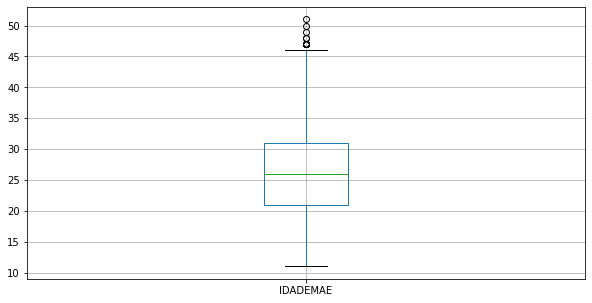

In [27]:
#Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers
sinasc.boxplot(column=['IDADEMAE'], figsize=(10,5))

In [7]:
#identificação dos outliers IDADEMAE
# Q1 e Q3
q = sinasc.PESO.quantile([0.25, 0.75]).values
limit_inf = q[0] - (q[1] - q[0]) * 1.5
limit_sup = q[1] + (q[1] - q[0]) * 1.5

sinasc_outliers = sinasc[(sinasc.PESO < limit_inf) | (sinasc.PESO > limit_sup)]
sinasc_outliers[['IDADEMAE']]

,IDADEMAE
30,34
76,29
119,18
146,32
147,37
...,...
33783,21
33817,22
33826,42
33833,22


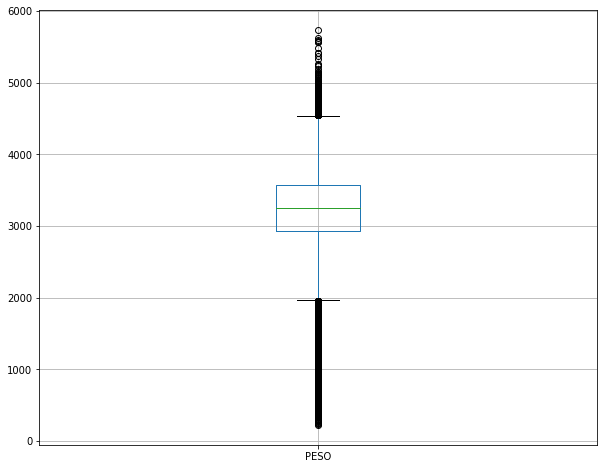

In [33]:
#Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.
sinasc.boxplot(column=['PESO'], figsize=(10,8))

In [8]:
#identificação dos outliers PESO

q = sinasc.PESO.quantile([0.50, 0.25]).values
limit_inf = q[0] - (q[1] - q[0]) * 1.5
limit_sup = q[1] + (q[1] - q[0]) * 1.5

sinasc_outliers = sinasc[(sinasc.PESO < limit_inf) | (sinasc.PESO > limit_sup)]
sinasc_outliers[['PESO']]

,PESO
0,3556.0
1,2760.0
2,3010.0
3,3720.0
4,2900.0
...,...
33862,2735.0
33863,3230.0
33864,3640.0
33865,3115.0


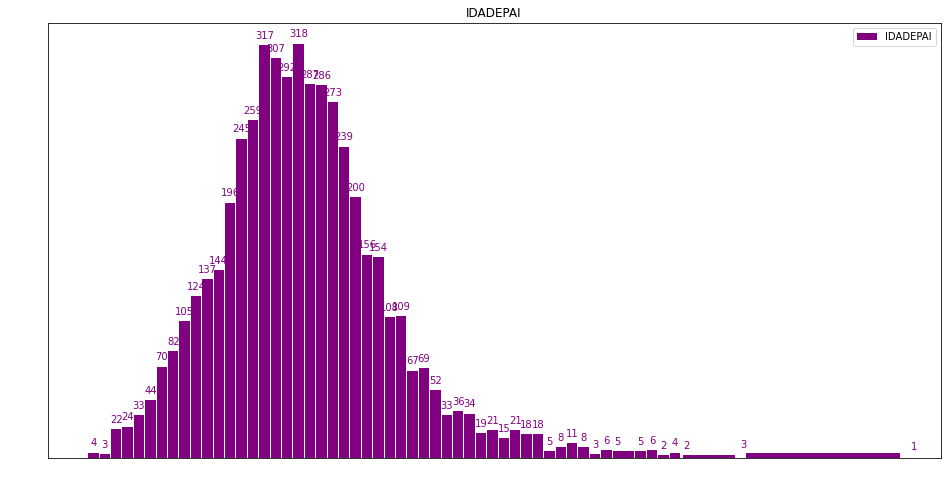

In [53]:
#Fazer o histograma da idade do pai
graf_hist = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(
    column='IDADEPAI', bins=sorted(graf_hist.keys()), grid=False, 
    color='purple', figsize=(16,8), rwidth=0.9, legend=True)

hist[0][0].tick_params(colors='white')
hist[0][0].xaxis.label.set_color('white')
hist[0][0].yaxis.label.set_color('white')
eixo = hist[0][0].set_xlabel('Idade')
eixo = hist[0][0].set_ylabel('Fequência')
eixo = hist[0][0].set_ylabel('Fequência')

x_ticks = []
for key, value in graf_hist.items():
  x_ticks.append(key)
  hist[0][0].text(key+0.5, value+5, int(value), color='purple', ha='center')
h = hist[0][0].set_xticks(x_ticks)

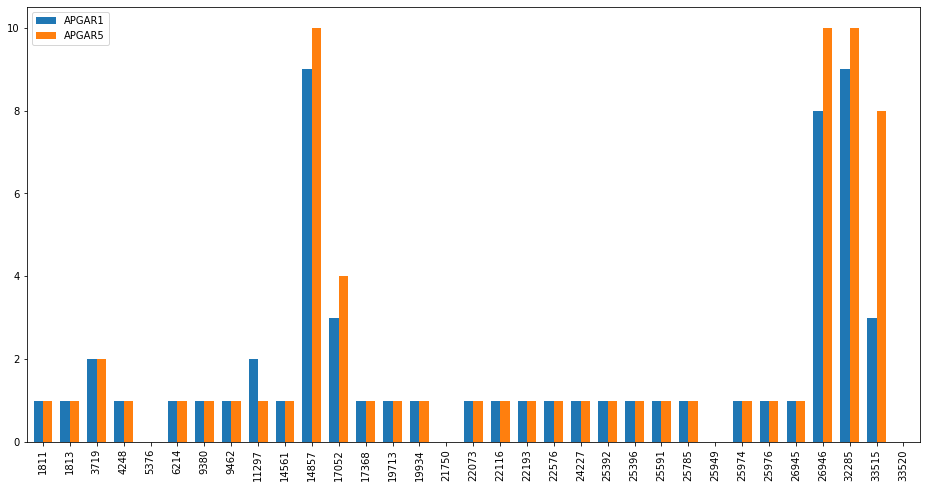

In [19]:
#Representar visualmente os diferentes valores de APGAR1 e APGAR5

gestacao_apgar = sinasc[sinasc.GESTACAO == '1'][['APGAR1','APGAR5']]
gestacao_apgar.plot(kind='bar', width=0.7, figsize=(16,8))

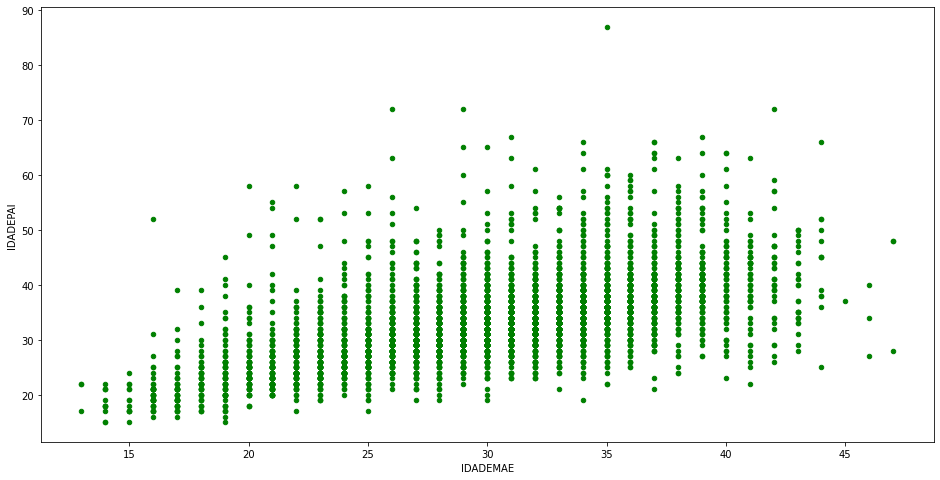

In [22]:
# Mostrar a dispersão entre idade do pai e idade da mãe

idades = sinasc[(sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
disp = idades.plot(kind='scatter',x='IDADEMAE', y='IDADEPAI', figsize=(16,8), color='green')


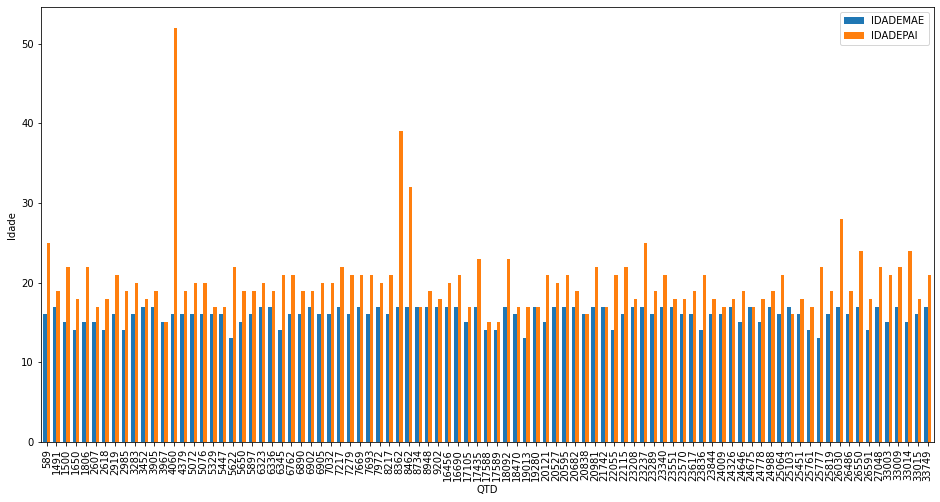

In [37]:
#Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos

idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
barras = idades.plot(kind='bar', width=0.7, figsize=(16,8))
eixo = barras.set(xlabel='QTD', ylabel='Idade')

In [43]:
Aracajú = sinasc[sinasc.CODMUNRES == '280030']
outras = sinasc[sinasc.CODMUNRES != '280030']

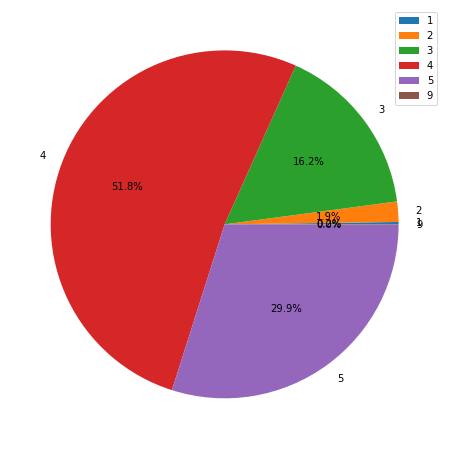

In [49]:
#Aracajú
grupo = Aracajú.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(16,8))
eixo = pizza.set(xlabel='', ylabel='')

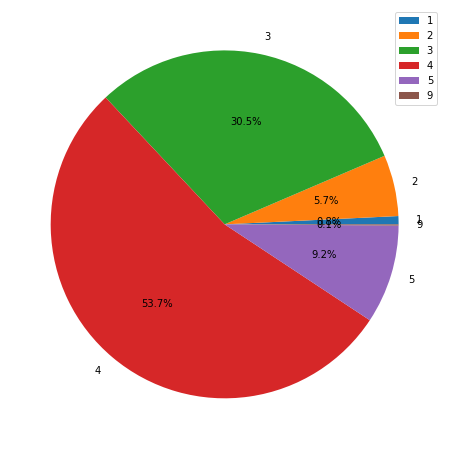

In [45]:
#Outras
grupo = outras.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(16,8))
eixo = pizza.set(xlabel='', ylabel='')